<a href="https://colab.research.google.com/github/SunkaraboinaPraveenKumar/Machine_Learning_Projects/blob/main/MNISTHandwrittenDigitClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the mnist data from keras dataset

In [2]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
type(X_train)

numpy.ndarray

In [4]:
#shape of the numpy arrays
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data 60,000 images

Test data 10,000 images

Image Dimension 28,28

Grayscale image 1 channel

In [5]:
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [6]:
print(X_train[10].shape)

(28, 28)


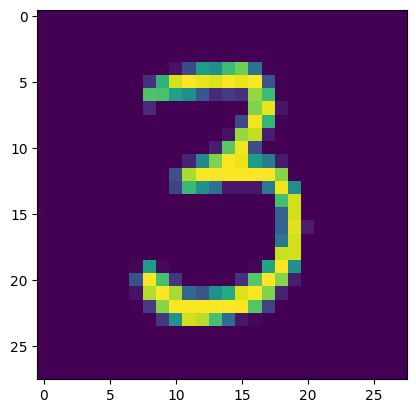

3


In [7]:
#displaying the image plt.imshow
plt.imshow(X_train[50])
plt.show()

#print the corresponding label
print(Y_train[50])

Image Labels

In [8]:
print(Y_train.shape)
print(Y_test.shape)

(60000,)
(10000,)


In [11]:
#unique values in Y_train
print(np.unique(Y_train))

#unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use this labels as such or we can also apply one Hot Encoding

All the images have same dimensions in this dataset if not we have to resize all the images to common dimensions

In [12]:
#scaling the values
X_train=X_train/255
X_test=X_test/255

In [13]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

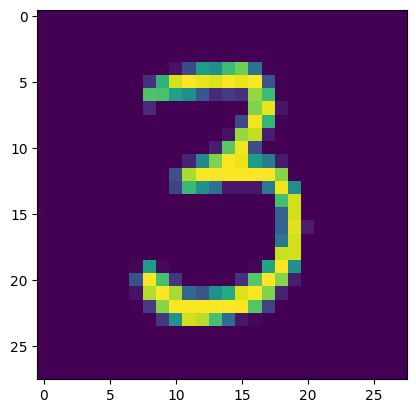

In [15]:
plt.imshow(X_train[50])
plt.show()

Building the Neural Network

In [16]:
#setting up layers for neural network
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

In [17]:
#compiling the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [18]:
#training the neural network
model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2985 - accuracy: 0.9131
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1422 - accuracy: 0.9583
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1042 - accuracy: 0.9684
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0847 - accuracy: 0.9744
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0694 - accuracy: 0.9781
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0590 - accuracy: 0.9812
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0515 - accuracy: 0.9833
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0458 - accuracy: 0.9853
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0394 - accuracy: 0.9873
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.03

Training data accuracy is 98.84

Accuracy on test data

In [19]:
loss,accuracy=model.evaluate(X_test,Y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0880 - accuracy: 0.9766
0.9765999913215637


Test Data Accuracy is 97.6%

In [20]:
print(X_test.shape)

(10000, 28, 28)


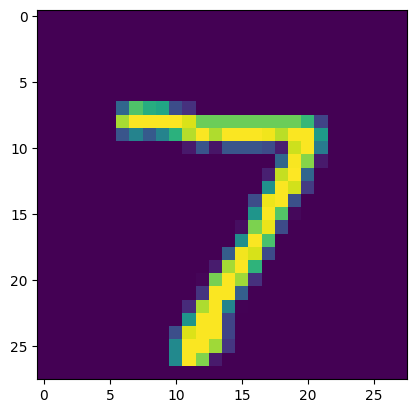

In [21]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [22]:
print(Y_test[0])

7


In [23]:
Y_pred=model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [24]:
Y_pred.shape

(10000, 10)

In [25]:
print(Y_pred[0])

[2.9907265e-04 2.5849493e-04 2.2461881e-01 5.9355390e-01 2.9973939e-09
 6.3520875e-03 9.7846031e-10 9.9998641e-01 7.7998932e-03 1.5665164e-02]


model.predict gives the prediction probabilty of each class for that particular datapoint

In [26]:
#converting the prediction probabilities to each class label

In [27]:
label_for_first_image=np.argmax(Y_pred[0])
print(label_for_first_image)

7


In [28]:
#converting the prediction probability to class labels
Y_pred_labels=[np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 2, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test is true labels

Y_pred labels are predicted by neural networks

Confusion matrix

In [29]:
conf_mat=confusion_matrix(Y_test,Y_pred_labels)

In [30]:
print(conf_mat)

tf.Tensor(
[[ 969    0    1    0    0    4    2    1    3    0]
 [   0 1122    3    1    0    0    2    1    6    0]
 [   3    1 1011    3    0    0    1    3   10    0]
 [   0    0    3  970    0   19    0    5    7    6]
 [   0    0    5    0  954    2    4    1    1   15]
 [   1    0    0    4    0  875    3    0    6    3]
 [   3    2    1    1    2   10  935    0    4    0]
 [   1    8   10    0    0    1    0  997    1   10]
 [   1    0    1    4    5   11    1    2  946    3]
 [   2    2    0    1    5    6    0    5    1  987]], shape=(10, 10), dtype=int32)


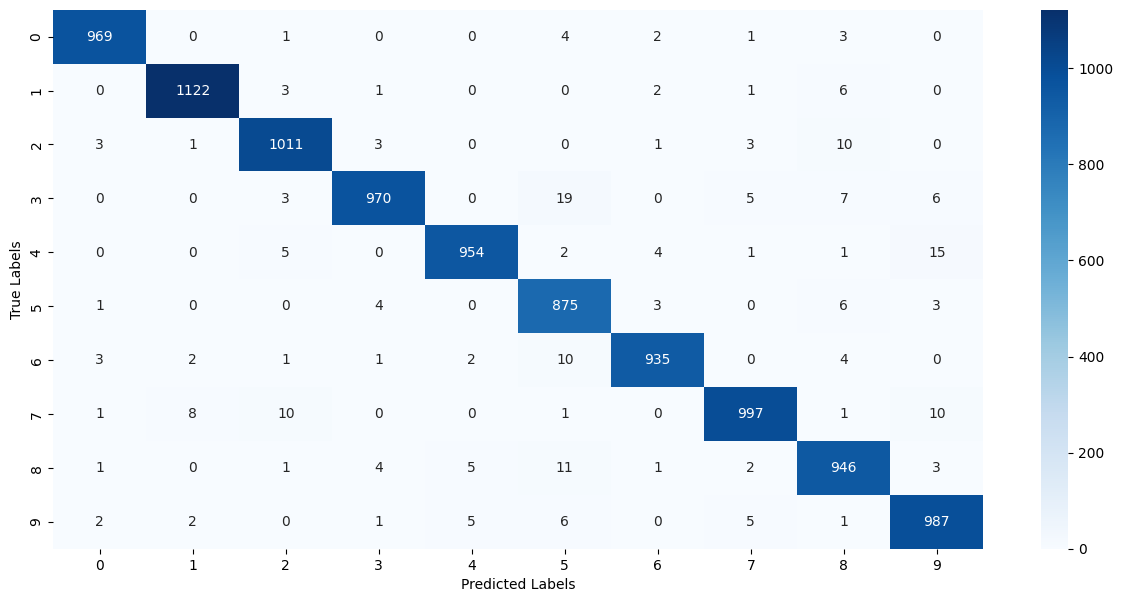

In [31]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Building a predictive system

In [69]:
input_image_path='/content/MNIST_digit.png'
input_image=cv2.imread(input_image_path)

In [70]:
type(input_image)

numpy.ndarray

In [71]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


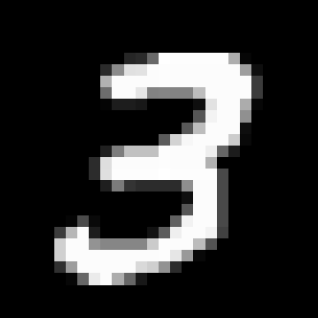

In [72]:
cv2_imshow(input_image)

In [73]:
input_image.shape

(318, 318, 3)

In [74]:
gray_scale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [75]:
gray_scale.shape

(318, 318)

In [76]:
input_image_resize=cv2.resize(gray_scale,(28,28))

In [77]:
cv2_imshow(input_image_resize)

In [78]:
input_image_resize.shape

(28, 28)

In [79]:
input_image_resize=input_image_resize/255

In [80]:
image_reshaped=np.reshape(input_image_resize,[1,28,28])

In [81]:
input_prediction=model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 22ms/step
[[6.9375387e-11 2.2238504e-07 4.4225701e-05 1.0000000e+00 1.2788371e-14
  6.6293991e-01 6.6356493e-14 1.3813311e-04 3.5417426e-01 4.2099098e-04]]


In [82]:
input_pred_label=np.argmax(input_prediction)

In [83]:
print(input_pred_label)

3
